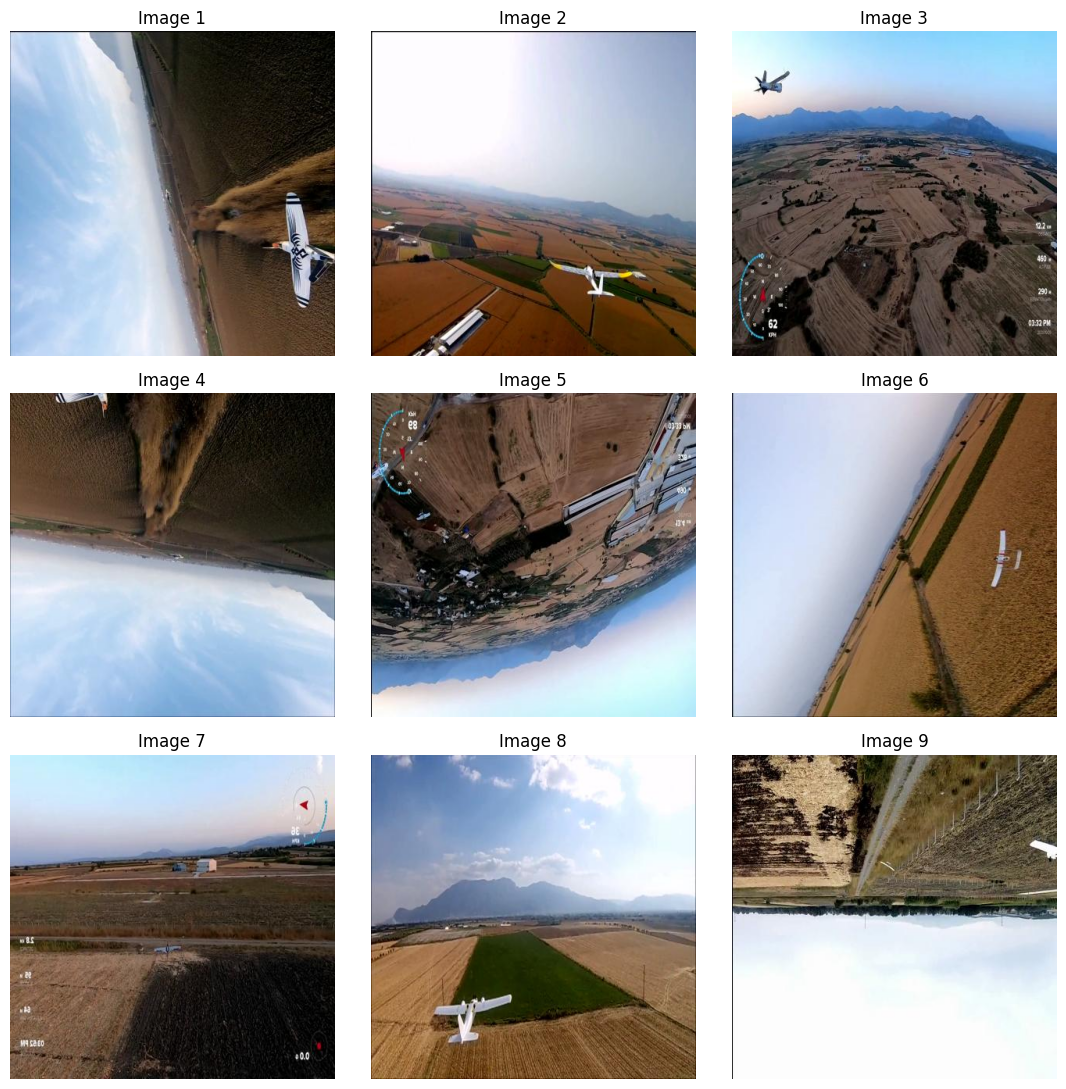

In [3]:
#requairement imports
import os #file processing
import random
from PIL import Image #to seeing images
import cv2 
from ultralytics import YOLO #pretrained model
from IPython.display import Video
import numpy as np 
import matplotlib.pyplot as plt
import torch
import warnings
warnings.filterwarnings('ignore')






# Modeli oluşturun
loaded_model = YOLO("C:\\Users\\524ha\\Desktop\\IHADetectModel\\Etiketleme.v1i.yolov4pytorch\\runs\\detect\\train9\\weights\\last.pt")






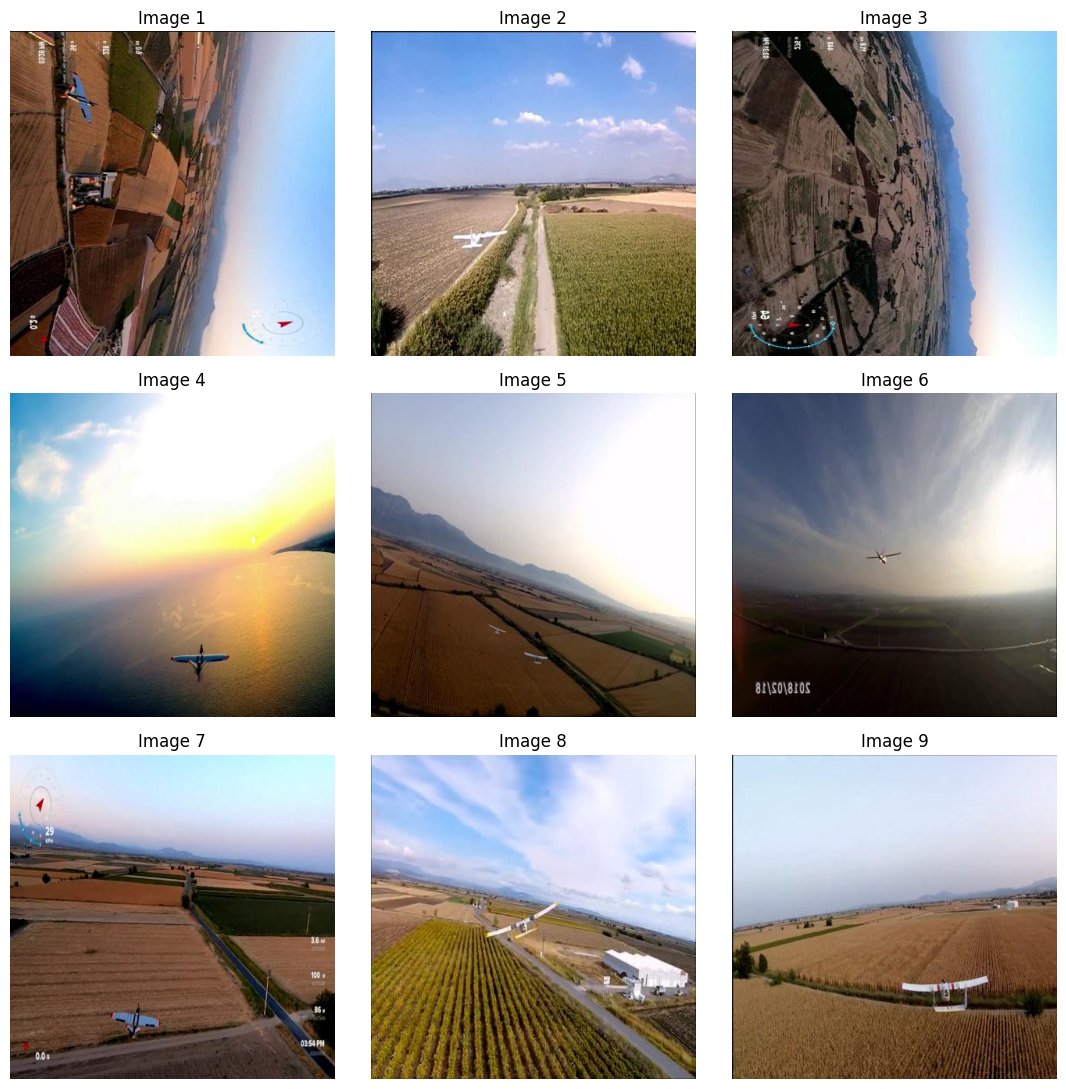

In [4]:
#Trying read the traing images  
Image_dir = 'C:\\Users\\524ha\\Desktop\\IHADetectModel\\Etiketleme.v1i.yolov4pytorch\\train\\images'

num_samples = 9
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


416 416 3


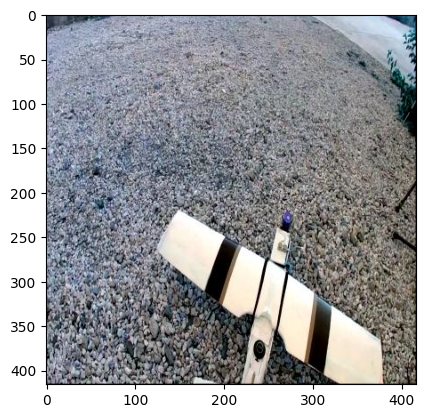

In [5]:
#Shape
image = cv2.imread("C:\\Users\\524ha\\Desktop\\IHADetectModel\\Etiketleme.v1i.yolov4pytorch\\train\\images\\frame_0001_png.rf.0bc3105cf658c0a72c7fcad18b06adae.jpg")
plt.imshow(image)
h, w, c = image.shape
print(h, w, c)


In [6]:
#import Premodel
model = YOLO("\\yolov8n\\yolov8n.pt")


In [7]:
# Use the model to detect object
image = cv2.imread(".\\train\\images\\frame_0001_png.rf.0bc3105cf658c0a72c7fcad18b06adae.jpg")
result_predict = model.predict(source = image, imgsz=(416))



0: 416x416 (no detections), 6.0ms
Speed: 5.0ms preprocess, 6.0ms inference, 41.7ms postprocess per image at shape (1, 3, 416, 416)


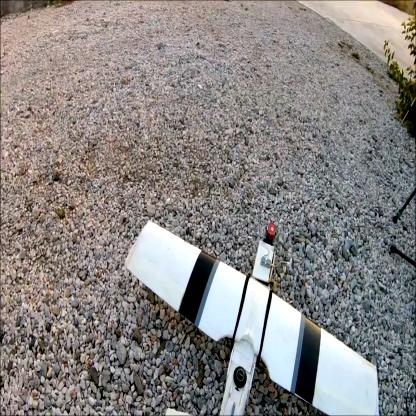

In [8]:
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
#Loading weight file
Final_model = YOLO('yolov8n.yaml').load('.\\yolov8n\\yolov8n.pt')

Transferred 355/355 items from pretrained weights


In [7]:
#Training own model with YOLO
Result_Final_model = Final_model.train(data=".\\yolov8n\\data.yaml", epochs=100, imgsz=416, batch=32, lr0=0.0001, dropout=0.15, device=0)

Ultralytics YOLOv8.1.16 🚀 Python-3.9.18 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=.\yolov8n\data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning C:\Users\524ha\Desktop\IHADetectModel\Etiketleme.v1i.yolov4pytorch\train\labels.cache... 10283 images, 309 backgrounds, 0 corrupt: 100%|██████████| 10283/10283 [00:00<?, ?it/s]
val: Scanning C:\Users\524ha\Desktop\IHADetectModel\Etiketleme.v1i.yolov4pytorch\valid\labels.cache... 546 images, 20 backgrounds, 0 corrupt: 100%|██████████| 546/546 [00:00<?, ?it/s]


Plotting labels to runs\detect\train9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train9
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.11G      1.448      2.065      1.074         15        416: 100%|██████████| 322/322 [00:41<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.19it/s]

                   all        546        632      0.817      0.769      0.823      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.11G      1.442      1.274      1.076         18        416: 100%|██████████| 322/322 [00:38<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.79it/s]

                   all        546        632       0.86      0.818      0.871      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.1G      1.513      1.212       1.12         14        416: 100%|██████████| 322/322 [00:37<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.53it/s]

                   all        546        632      0.743      0.589       0.66      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.11G      1.572       1.21      1.168         27        416: 100%|██████████| 322/322 [00:37<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]

                   all        546        632      0.833      0.724      0.817      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.1G      1.512      1.091      1.137         22        416: 100%|██████████| 322/322 [00:37<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.89it/s]

                   all        546        632      0.846      0.761      0.843      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.11G      1.466      1.038      1.125         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.57it/s]

                   all        546        632      0.872      0.819      0.879       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.11G      1.435     0.9986      1.114         19        416: 100%|██████████| 322/322 [00:38<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]

                   all        546        632      0.883      0.796      0.878       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.11G      1.394     0.9524      1.093         23        416: 100%|██████████| 322/322 [00:37<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]

                   all        546        632      0.875      0.777      0.861      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.11G      1.376     0.9204      1.087         20        416: 100%|██████████| 322/322 [00:37<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]

                   all        546        632      0.916      0.701      0.803      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.11G      1.349     0.9085      1.081         12        416: 100%|██████████| 322/322 [00:37<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]

                   all        546        632       0.87       0.82      0.885      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.11G      1.334     0.8835      1.068         21        416: 100%|██████████| 322/322 [00:37<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]

                   all        546        632      0.927      0.824      0.913      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.11G      1.322     0.8609       1.06         23        416: 100%|██████████| 322/322 [00:37<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]

                   all        546        632      0.893      0.859      0.909      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.11G      1.307     0.8499      1.056         16        416: 100%|██████████| 322/322 [00:38<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]

                   all        546        632       0.88       0.85      0.919      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.11G       1.29     0.8397      1.052         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]

                   all        546        632      0.892      0.884      0.926      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.11G      1.286     0.8233      1.045         24        416: 100%|██████████| 322/322 [00:37<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        546        632      0.911      0.866      0.921      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.11G      1.264     0.8084      1.042         25        416: 100%|██████████| 322/322 [00:37<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        546        632      0.911      0.875      0.938      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.11G      1.259     0.7939      1.037         30        416: 100%|██████████| 322/322 [00:37<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]

                   all        546        632      0.923      0.861      0.926      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.11G      1.258     0.7964      1.037         20        416: 100%|██████████| 322/322 [00:37<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.95it/s]

                   all        546        632      0.914      0.874      0.924      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.11G      1.241     0.7758      1.031         27        416: 100%|██████████| 322/322 [00:37<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        546        632      0.927      0.861      0.926      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.11G       1.24     0.7732      1.028         14        416: 100%|██████████| 322/322 [00:37<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]

                   all        546        632      0.896      0.886      0.932      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.11G      1.233     0.7722      1.028         24        416: 100%|██████████| 322/322 [00:37<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        546        632      0.909      0.899      0.937       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.11G      1.218     0.7577      1.025         15        416: 100%|██████████| 322/322 [00:37<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]

                   all        546        632      0.923      0.869      0.935      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.1G      1.214     0.7455      1.026         19        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]

                   all        546        632      0.928      0.875      0.947      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.1G      1.214     0.7412      1.017         21        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]

                   all        546        632      0.925      0.884      0.935      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.1G      1.202     0.7311      1.015          9        416: 100%|██████████| 322/322 [00:37<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]

                   all        546        632      0.919       0.88      0.943       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.11G      1.204     0.7272      1.015         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]

                   all        546        632      0.913      0.899      0.951      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.1G      1.194     0.7337      1.014         18        416: 100%|██████████| 322/322 [00:37<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        546        632      0.927      0.886      0.942      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.11G      1.193     0.7215      1.006         23        416: 100%|██████████| 322/322 [00:37<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]

                   all        546        632      0.914      0.902      0.952      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.11G      1.179     0.7148      1.008         22        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]

                   all        546        632      0.929      0.871      0.936      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.1G      1.173     0.7118      1.005         17        416: 100%|██████████| 322/322 [00:38<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.54it/s]

                   all        546        632      0.925      0.881      0.954      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.11G      1.175     0.7009      1.004         24        416: 100%|██████████| 322/322 [00:38<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]

                   all        546        632      0.914      0.905      0.949      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.11G      1.164     0.7029     0.9985         22        416: 100%|██████████| 322/322 [00:37<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]

                   all        546        632      0.919      0.894      0.946      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.11G      1.164     0.7026     0.9982         17        416: 100%|██████████| 322/322 [00:37<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]

                   all        546        632      0.919      0.898      0.949      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.11G      1.156     0.6797     0.9953         18        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]

                   all        546        632      0.914      0.919       0.95      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.11G      1.146     0.6824     0.9943         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]

                   all        546        632      0.949      0.878      0.955      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.11G      1.143     0.6821     0.9922         21        416: 100%|██████████| 322/322 [00:37<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]

                   all        546        632      0.944       0.88      0.951      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.1G      1.151     0.6788      0.997         20        416: 100%|██████████| 322/322 [00:37<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]

                   all        546        632       0.91      0.922      0.957      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.11G       1.14     0.6702     0.9958         25        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]

                   all        546        632       0.91      0.924      0.954      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.1G      1.136     0.6669     0.9902         14        416: 100%|██████████| 322/322 [00:37<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.85it/s]

                   all        546        632      0.913      0.922      0.951      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.11G      1.128     0.6595     0.9839         23        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]

                   all        546        632      0.915      0.915      0.955      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.1G      1.124     0.6598     0.9834         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        546        632      0.919      0.903      0.952      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.11G      1.131     0.6565     0.9836         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.95it/s]

                   all        546        632      0.922      0.917      0.953      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.11G       1.12     0.6474     0.9825         19        416: 100%|██████████| 322/322 [00:37<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]

                   all        546        632      0.925       0.91      0.949      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.1G       1.11      0.651     0.9779         15        416: 100%|██████████| 322/322 [00:37<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]

                   all        546        632      0.949      0.889      0.955      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.11G      1.111     0.6446     0.9745         24        416: 100%|██████████| 322/322 [00:37<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]

                   all        546        632      0.929        0.9      0.952      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.11G      1.111     0.6419     0.9765         26        416: 100%|██████████| 322/322 [00:37<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]

                   all        546        632      0.954      0.902      0.959      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.1G      1.104     0.6365     0.9786         22        416: 100%|██████████| 322/322 [00:38<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        546        632      0.929      0.922      0.957       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.1G      1.102     0.6347      0.972         12        416: 100%|██████████| 322/322 [00:37<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]

                   all        546        632      0.928      0.931      0.961      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.11G      1.095     0.6266     0.9748         22        416: 100%|██████████| 322/322 [00:37<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]

                   all        546        632      0.926      0.927      0.959      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.11G      1.099     0.6222     0.9733         25        416: 100%|██████████| 322/322 [00:37<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        546        632      0.934      0.919      0.962      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.11G       1.09     0.6224     0.9713         18        416: 100%|██████████| 322/322 [00:48<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        546        632      0.937      0.916      0.959      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.11G      1.086     0.6261     0.9701         19        416: 100%|██████████| 322/322 [00:38<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        546        632      0.929      0.928      0.962      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.11G      1.077     0.6135     0.9622         17        416: 100%|██████████| 322/322 [00:37<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        546        632      0.923      0.927      0.956      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.11G      1.069     0.6051      0.963         21        416: 100%|██████████| 322/322 [00:41<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]

                   all        546        632      0.918       0.93      0.957      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.1G       1.07     0.6137     0.9667         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]

                   all        546        632      0.925      0.935      0.965      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.11G      1.067      0.605     0.9686         18        416: 100%|██████████| 322/322 [00:37<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]

                   all        546        632      0.928       0.93      0.962      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.1G       1.07     0.6125     0.9596         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]

                   all        546        632      0.954      0.915      0.962      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.1G      1.072     0.6051     0.9638         13        416: 100%|██████████| 322/322 [00:37<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]

                   all        546        632       0.94      0.918      0.959      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.11G      1.056     0.5932     0.9606         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        546        632      0.957      0.903      0.961      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.1G      1.065     0.5984     0.9578         12        416: 100%|██████████| 322/322 [00:37<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]

                   all        546        632      0.931      0.924      0.962      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.1G      1.054     0.5896     0.9582         22        416: 100%|██████████| 322/322 [00:37<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.28it/s]

                   all        546        632      0.916       0.94      0.962      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.11G      1.051     0.5894     0.9589         25        416: 100%|██████████| 322/322 [00:39<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.57it/s]

                   all        546        632      0.943       0.92      0.967       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.1G      1.047     0.5892     0.9533         15        416: 100%|██████████| 322/322 [00:37<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        546        632      0.934      0.925      0.964       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.1G      1.034     0.5804     0.9515         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]

                   all        546        632      0.937      0.923      0.963      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.11G      1.036     0.5805     0.9594         17        416: 100%|██████████| 322/322 [00:37<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]

                   all        546        632      0.929      0.931      0.965      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.11G      1.041     0.5773     0.9516         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        546        632      0.937      0.929      0.964       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.11G      1.034     0.5765     0.9499         25        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]

                   all        546        632      0.938       0.93      0.966       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.1G       1.03     0.5676     0.9521         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]

                   all        546        632      0.937      0.929      0.964      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.11G      1.028     0.5699     0.9513         25        416: 100%|██████████| 322/322 [00:37<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]

                   all        546        632      0.939      0.929      0.967       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.11G      1.028     0.5652     0.9501         18        416: 100%|██████████| 322/322 [00:37<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.95it/s]

                   all        546        632      0.942      0.923      0.964      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.1G      1.021     0.5632      0.952         15        416: 100%|██████████| 322/322 [00:37<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.45it/s]

                   all        546        632      0.941      0.926      0.967      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.11G      1.013     0.5563     0.9425         14        416: 100%|██████████| 322/322 [00:38<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        546        632      0.943      0.927      0.969      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.1G      1.014     0.5556     0.9452         15        416: 100%|██████████| 322/322 [00:37<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]

                   all        546        632      0.948      0.926      0.969      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.11G     0.9995     0.5482     0.9418         20        416: 100%|██████████| 322/322 [00:37<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.89it/s]

                   all        546        632      0.951      0.927       0.97      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.11G     0.9997     0.5517     0.9439         25        416: 100%|██████████| 322/322 [00:37<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]

                   all        546        632      0.943      0.927      0.969      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.11G     0.9886     0.5396     0.9393         23        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]

                   all        546        632      0.947      0.926       0.97      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.11G     0.9967     0.5438     0.9369         23        416: 100%|██████████| 322/322 [00:37<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]

                   all        546        632      0.949      0.921      0.969      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.11G     0.9915     0.5403     0.9348         25        416: 100%|██████████| 322/322 [00:37<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]

                   all        546        632      0.951      0.928       0.97       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.11G     0.9807     0.5364     0.9338         23        416: 100%|██████████| 322/322 [00:37<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]

                   all        546        632      0.947      0.932      0.969       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.1G     0.9879     0.5397     0.9352         14        416: 100%|██████████| 322/322 [00:37<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]

                   all        546        632      0.947      0.927      0.968      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.11G      0.984     0.5323     0.9365         19        416: 100%|██████████| 322/322 [00:37<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.87it/s]

                   all        546        632      0.947      0.927      0.968      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.11G     0.9803     0.5316     0.9374         21        416: 100%|██████████| 322/322 [00:37<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        546        632      0.946       0.93      0.969       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.11G     0.9727      0.527     0.9362         24        416: 100%|██████████| 322/322 [00:37<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]

                   all        546        632      0.949      0.922      0.969      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.11G     0.9766     0.5263     0.9334         17        416: 100%|██████████| 322/322 [00:37<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        546        632       0.94       0.93      0.966      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.1G     0.9697     0.5232     0.9298         26        416: 100%|██████████| 322/322 [00:37<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]

                   all        546        632      0.943       0.93      0.969      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.11G      0.967     0.5219      0.931         16        416: 100%|██████████| 322/322 [00:37<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]

                   all        546        632      0.945      0.931      0.968      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.11G     0.9532     0.5098     0.9283         19        416: 100%|██████████| 322/322 [00:37<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        546        632      0.951      0.929      0.969      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.11G     0.9669     0.5167     0.9305         32        416: 100%|██████████| 322/322 [00:37<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        546        632       0.95      0.927      0.968      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.11G     0.9519     0.5096     0.9287         14        416: 100%|██████████| 322/322 [00:37<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        546        632      0.943       0.93      0.968      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.11G     0.9527     0.5093     0.9294         25        416: 100%|██████████| 322/322 [00:37<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]

                   all        546        632      0.948      0.925      0.968      0.696


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.1G     0.9143      0.444     0.8964         17        416: 100%|██████████| 322/322 [00:36<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]

                   all        546        632       0.95      0.927      0.971      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.1G     0.9034     0.4372     0.8959         13        416: 100%|██████████| 322/322 [00:36<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]

                   all        546        632      0.946       0.93      0.971      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.1G     0.8888       0.43      0.887         12        416: 100%|██████████| 322/322 [00:36<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]

                   all        546        632      0.948      0.924      0.971      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.1G     0.8924     0.4294     0.8904         11        416: 100%|██████████| 322/322 [00:36<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.30it/s]

                   all        546        632      0.945       0.93       0.97      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.1G     0.8788     0.4209      0.887         13        416: 100%|██████████| 322/322 [00:36<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]

                   all        546        632      0.942      0.937      0.967      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.1G     0.8797     0.4218     0.8875         15        416: 100%|██████████| 322/322 [00:36<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]

                   all        546        632      0.943      0.937      0.967      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.1G      0.864     0.4145     0.8825         13        416: 100%|██████████| 322/322 [00:36<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        546        632      0.945      0.937      0.967      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.1G     0.8678      0.414     0.8858         14        416: 100%|██████████| 322/322 [00:36<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        546        632      0.943      0.937      0.967      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.1G     0.8647     0.4136     0.8835         11        416: 100%|██████████| 322/322 [00:36<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]

                   all        546        632      0.943      0.938      0.971      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.1G      0.859     0.4093     0.8826         13        416: 100%|██████████| 322/322 [00:44<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        546        632      0.942      0.938      0.971      0.697



100 epochs completed in 1.117 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 6.2MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.9.18 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.27it/s]


                   all        546        632      0.933      0.949      0.971      0.696
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train9


In [10]:
#We are trying our own model
image32 = cv2.imread('C:\\Users\\524ha\\Desktop\\IHADetectModel\\Etiketleme.v1i.yolov4pytorch\\train\\images\\frame_0001_png.rf.0bc3105cf658c0a72c7fcad18b06adae.jpg')



0: 416x416 1 IHA, 17.7ms
Speed: 3.0ms preprocess, 17.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)


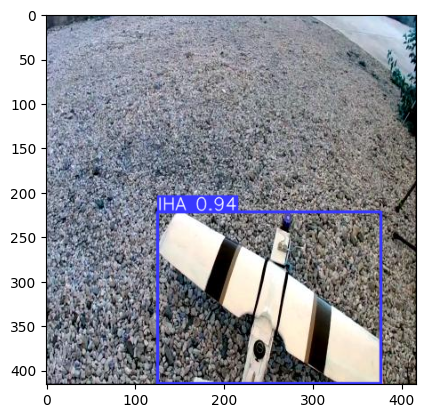

In [16]:
loaded_model = YOLO(".\\runs\\detect\\train9\\weights\\last.pt")
img = loaded_model.predict(source = image32, imgsz=(416))
plot = img[0].plot()
plt.imshow(plot)


In [4]:
loaded_model = YOLO("C:\\Users\\524ha\\Desktop\\IHADetectModel\\Etiketleme.v1i.yolov4pytorch\\runs\\detect\\train9\\weights\\last.pt")



0: 256x416 1 IHA, 89.0ms
Speed: 4.1ms preprocess, 89.0ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)


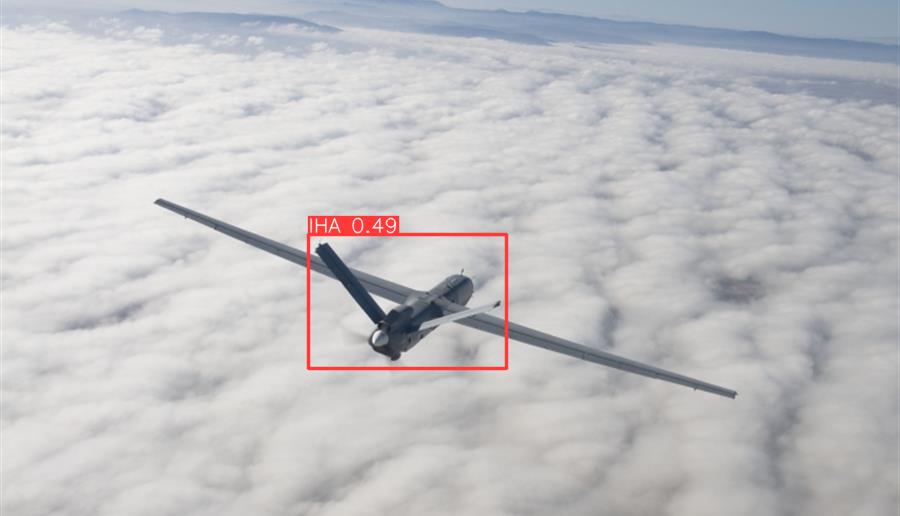

In [17]:
image = cv2.imread(".\\test\\images\\1.jpg")
result_predict = loaded_model.predict(source = image, imgsz=(416))
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [6]:
#This code was used to video
import cv2
cap = cv2.VideoCapture(".\\video2.mp4")
while True:
    ret, frame = cap.read()

    result_predict = loaded_model.predict(source = frame, imgsz=(416))

    plot = result_predict[0].plot()
    cv2.imshow("img", plot)

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()


0: 256x416 (no detections), 16.5ms
Speed: 484.2ms preprocess, 16.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 IHA, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 23.2ms
Speed: 1.0ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference